In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

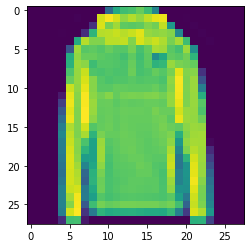

In [4]:
plt.imshow(train_images[24])

In [5]:
#Reescalemos las imágenes
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [6]:
#Reshape
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [7]:
#Hacer una especie de one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

## Modelo de datos

In [8]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()

2022-10-22 04:06:13.386832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 04:06:13.387874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 04:06:13.733145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 04:06:13.734161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 04:06:13.735045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [9]:
model.compile(loss='categorical_crossentropy', 
             optimizer='rmsprop', 
             metrics=['accuracy']
             )

In [10]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

2022-10-22 04:06:20.458648: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-22 04:06:23.395949: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


938/938 [==============================] - 19s 5ms/step - loss: 0.5831 - accuracy: 0.7860
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4060 - accuracy: 0.8547
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3616 - accuracy: 0.8703
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3419 - accuracy: 0.8778
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3287 - accuracy: 0.8828
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3250 - accuracy: 0.8855
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3185 - accuracy: 0.8888
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3174 - accuracy: 0.8893
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3178 - accuracy: 0.8892
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3201 - accuracy: 0.8888


In [11]:
model.evaluate(test_images, test_labels, verbose=0)

[0.31009072065353394, 0.8992999792098999]

# Callbacks, early stoppings & chekpoints

**EarlyStoppings**

In [12]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
model.fit(train_images, 
          train_labels, 
          batch_size=64, 
          callbacks=[early],
          epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3214 - accuracy: 0.8885
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3211 - accuracy: 0.8887
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3222 - accuracy: 0.8886


**CheckPoint**

In [13]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='mi_primer_red_conv.hdf5', 
                                  verbose=1, 
                                  monitor = 'accuracy', 
                                  save_best_only=True)
model.fit(train_images, 
          train_labels, 
          batch_size=64, 
          callbacks=[checkpoint],
          epochs=10)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3235 - accuracy: 0.8887

Epoch 00001: accuracy improved from -inf to 0.88865, saving model to mi_primer_red_conv.hdf5
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3249 - accuracy: 0.8881

Epoch 00002: accuracy did not improve from 0.88865
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3277 - accuracy: 0.8891

Epoch 00003: accuracy improved from 0.88865 to 0.88912, saving model to mi_primer_red_conv.hdf5
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3292 - accuracy: 0.8871

Epoch 00004: accuracy did not improve from 0.88912
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3313 - accuracy: 0.8868

Epoch 00005: accuracy did not improve from 0.88912
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3332 - accuracy: 0.8854

Epoch 00006: accuracy did not improve from 0.88912
E

In [16]:
model2 = model
model2.load_weights('./mi_primer_red_conv.hdf5')
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3066 - accuracy: 0.8998


[0.3066357374191284, 0.8998000025749207]